# Gráficos de Linhas para Séries Temporais
Prof. Fernando Amaral

In [2]:
from datetime import datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
df = pd.read_csv("../../Dados/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index("Time")
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


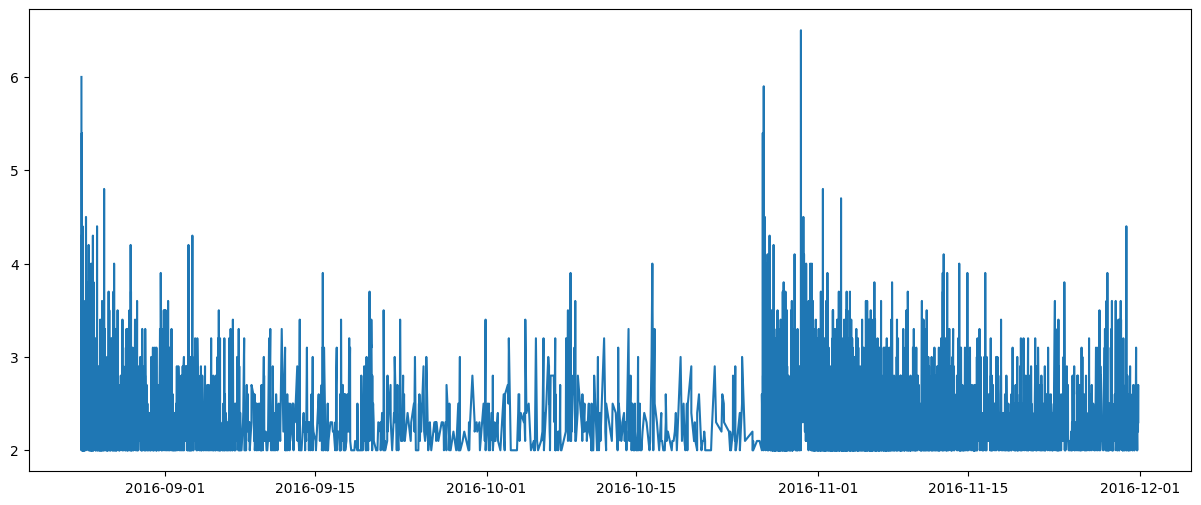

In [5]:
plt.plot(df["Magnitude"])
plt.show()

C:\Users\lucas.souza\AppData\Local\Temp\ipykernel_10784\4197039272.py:3: FutureWarning: The provided callable <function mean at 0x0000024312762520> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  res = df["Magnitude"].resample("D").apply([np.mean])


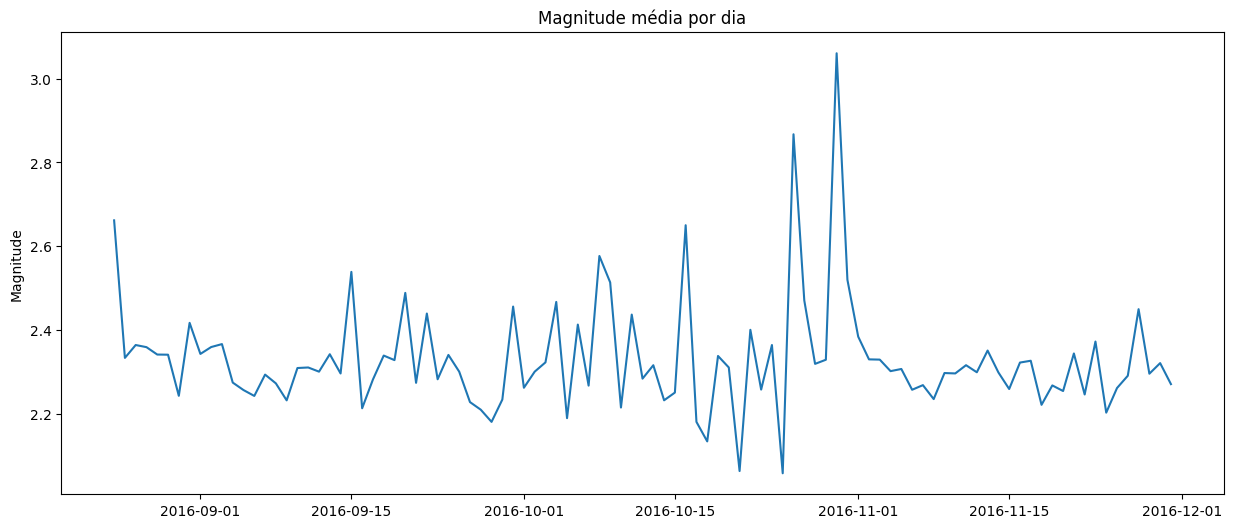

In [6]:
# resample com média por dia
# W,M
res = df["Magnitude"].resample("D").apply([np.mean])
plt.plot(res)
plt.title("Magnitude média por dia")
plt.ylabel("Magnitude")
plt.show()

C:\Users\lucas.souza\AppData\Local\Temp\ipykernel_10784\2879263924.py:1: FutureWarning: The provided callable <function mean at 0x0000024312762520> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  res = df["Magnitude"].resample("2D").apply([np.mean])


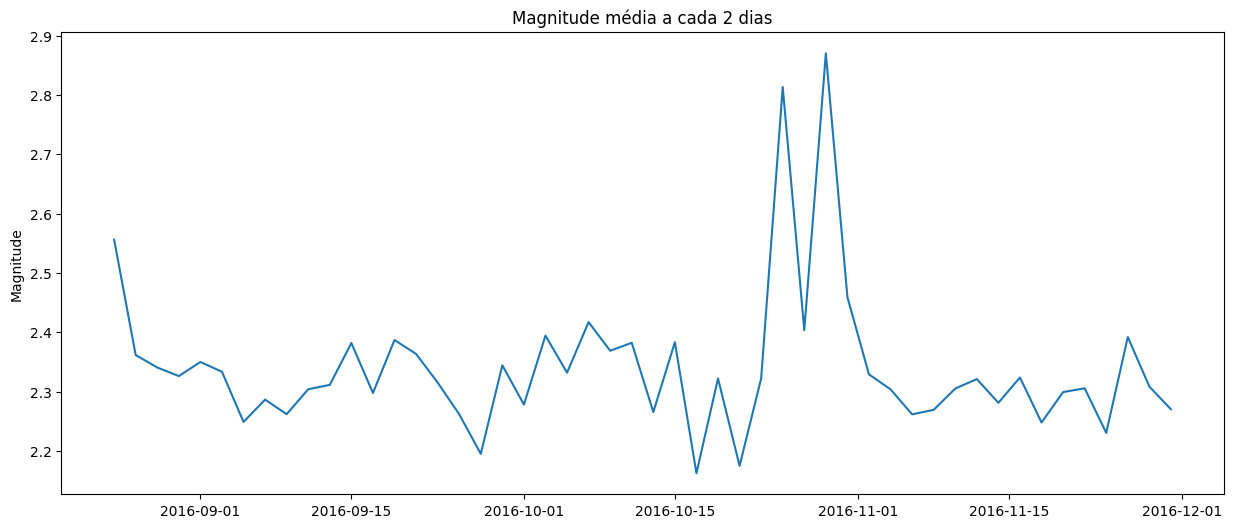

In [7]:
res = df["Magnitude"].resample("2D").apply([np.mean])
plt.plot(res)
plt.title("Magnitude média a cada 2 dias")
plt.ylabel("Magnitude")
plt.show()

In [8]:
df["Magnitude"].describe()

count    8086.000000
mean        2.398368
std         0.426381
min         2.000000
25%         2.100000
50%         2.300000
75%         2.600000
max         6.500000
Name: Magnitude, dtype: float64

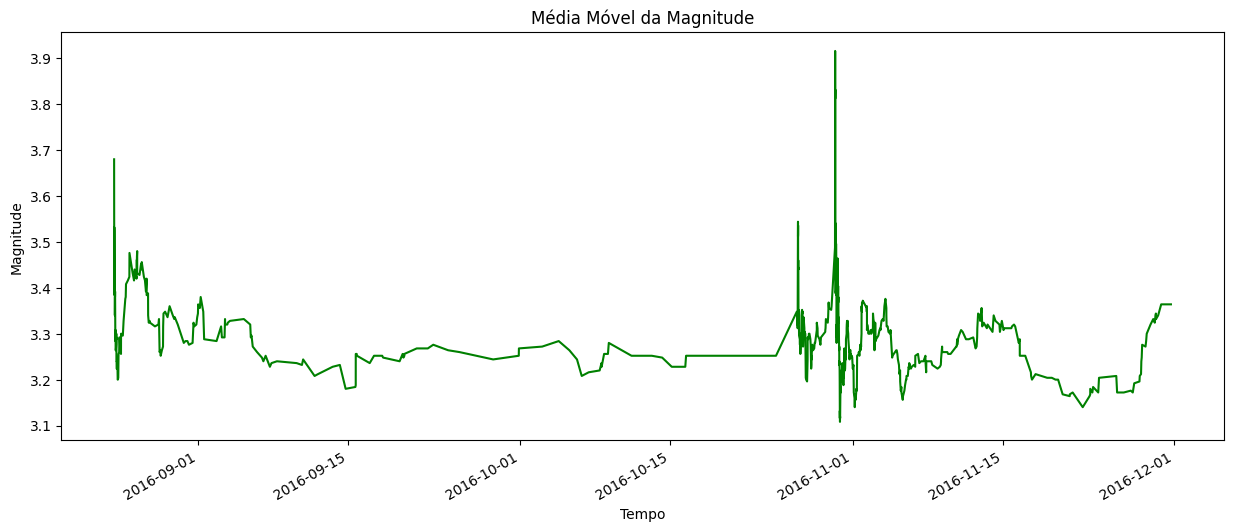

In [9]:
# apenas magnitude maior ou igual a 3
magn3 = df.loc[df["Magnitude"] >= 3.0, "Magnitude"]
# média móvel, janela 25 períodos
pd.Series.rolling(magn3, window=25).mean().plot(style="g")
plt.title("Média Móvel da Magnitude")
plt.ylabel("Magnitude")
plt.xlabel("Tempo")
plt.show()